# Importing Necessary Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Read the Data Set

In [68]:
data = pd.read_excel("EBP.xlsx")

In [69]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


# General Data Description

In [70]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [71]:
data = data.drop('Date of Joining', axis = 1)

In [72]:
data = data.drop('Employee ID', axis = 1)

In [73]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})



In [74]:
data_1 = data

In [75]:
data_1.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
2,0,0,1,2,NaN,5.8,0.49
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52


In [76]:
data_1.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [77]:
data_nonull = data.dropna()

In [78]:
data_nonull.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29


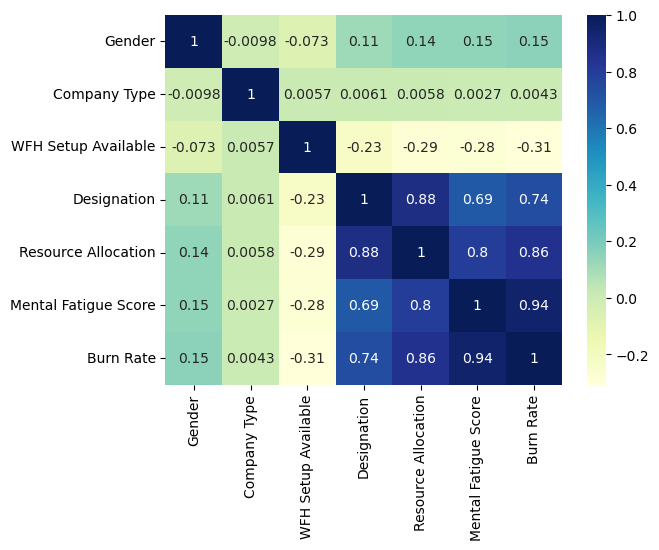

In [79]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

In [80]:
data.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [81]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [82]:
# Mental Fatigue Score

In [83]:
mfs_test_data = data[
    data['Mental Fatigue Score'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Mental Fatigue Score']]

columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Mental Fatigue Score']
mfs_train_data = data_nonull[columns_to_keep]

mfs_y_train = mfs_train_data['Mental Fatigue Score']

mfs_x_train = mfs_train_data.drop("Mental Fatigue Score",axis =1)

lr = LinearRegression()

lr.fit(mfs_x_train, mfs_y_train)

mfs_X_test = mfs_test_data.drop("Mental Fatigue Score", axis=1)

mfs_y_pred = lr.predict(mfs_X_test)

mfs_test_data.loc[mfs_test_data['Mental Fatigue Score'].isnull(), 'Mental Fatigue Score'] = mfs_y_pred

data['Mental Fatigue Score'] = data['Mental Fatigue Score'].fillna(mfs_test_data['Mental Fatigue Score'])


In [84]:
data.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score       0
Burn Rate               1124
dtype: int64

In [ ]:
# Resource Allocation

In [85]:
ra_test_data = data[
    data['Resource Allocation'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score']]

columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score']
ra_train_data = data_nonull[columns_to_keep]

ra_y_train = ra_train_data['Resource Allocation']

ra_x_train = ra_train_data.drop("Resource Allocation",axis =1)

lr = LinearRegression()

lr.fit(ra_x_train, ra_y_train)

ra_X_test = ra_test_data.drop("Resource Allocation", axis=1)

ra_y_pred = lr.predict(ra_X_test)

ra_test_data.loc[ra_test_data['Resource Allocation'].isnull(), 'Resource Allocation'] = ra_y_pred

data['Resource Allocation'] = data['Resource Allocation'].fillna(ra_test_data['Resource Allocation'])


In [86]:
data.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate               1124
dtype: int64

In [ ]:
# Burn Rate

In [87]:
br_test_data = data[
    data['Burn Rate'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']]

columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']
br_train_data = data_nonull[columns_to_keep]

br_y_train = br_train_data['Burn Rate']

br_x_train = br_train_data.drop("Burn Rate",axis =1)

lr = LinearRegression()

lr.fit(br_x_train, br_y_train)

br_X_test = br_test_data.drop("Burn Rate", axis=1)

br_y_pred = lr.predict(br_X_test)

br_test_data.loc[br_test_data['Burn Rate'].isnull(), 'Burn Rate'] = br_y_pred

data['Burn Rate'] = data['Burn Rate'].fillna(br_test_data['Burn Rate'])


In [88]:
data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

# Result

In [89]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

lr.fit(X_train, y_train)

prediction = lr.predict(X_test)
print('Linear Regression: ')
r2_score(y_test, prediction)

Linear Regression: 


0.9021817509402037